# Qiskit QML - Fitting a curve based on noisy data

Starting with imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit.utils import algorithm_globals


Creating our noisy data

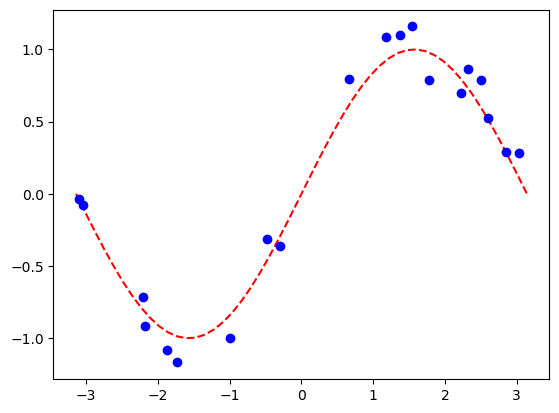

In [3]:

num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

Now preparing feature map and ansatz for our Variational Quantum Regressor

In [4]:
from qiskit.algorithms.optimizers import L_BFGS_B
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_machine_learning.algorithms import VQR

# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5)
)

Fitting theregressor and scoring the results

In [5]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(X, y)

0.971116364186756

Plotting the results

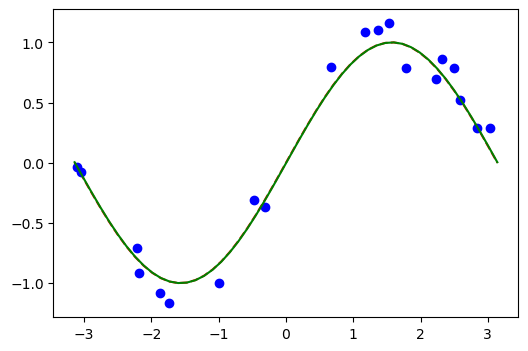

In [6]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = vqr.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()

